In [51]:
import math
import sys
import matplotlib.pyplot as plt
import numpy as np

In [52]:
#Original Function

def bisection(f, a, b, tol):
    # f is the function
    # a is the left endpoint
    # b is the right endpoint
    # tol is the tolerance
    count = 0 # counts the number of iterations
    while (b-a)/2 > tol: # iterate while error > tol
        p = (a+b)/2 # approx solution
        if f(a)*f(p)<0:
            b = p
        else:
            a = p
        count+=1 # add to count
    return p, count # return both root and count

# Question 1

## 1.a

x ** 2 − 4x + 4 − ln(x) = 0 in [1, 2]

In [53]:
func1 = lambda x: x ** 2 - 4 * x + 4 - math.log(x)
a1 = 1
b1 = 2
tol1 = 10 ** -8

bisection(func1, a1, b1, tol1)

(1.4123911708593369, 26)

## 1.b

x ** x = 50 in [3, 4]

becomes

x ** x - 50 = 0 in [3, 4]

In [55]:
func2 = lambda x: x ** x - 50
a1 = 3
b1 = 4
tol1 = 10 ** -8

bisection(func2, a1, b1, tol1)

(3.287262186408043, 26)

## 1.c

2x + 3 cos(x) − e ** x = 0 in [−1, 1]

In [56]:
func3 = lambda x: 2 * x + 3 * math.cos(x) - math.e ** x
a1 = -1
b1 = 1
tol1 = 10 ** -8

bisection(func3, a1, b1, tol1)

(-0.8109753280878067, 27)

# Question 2

# 2.a

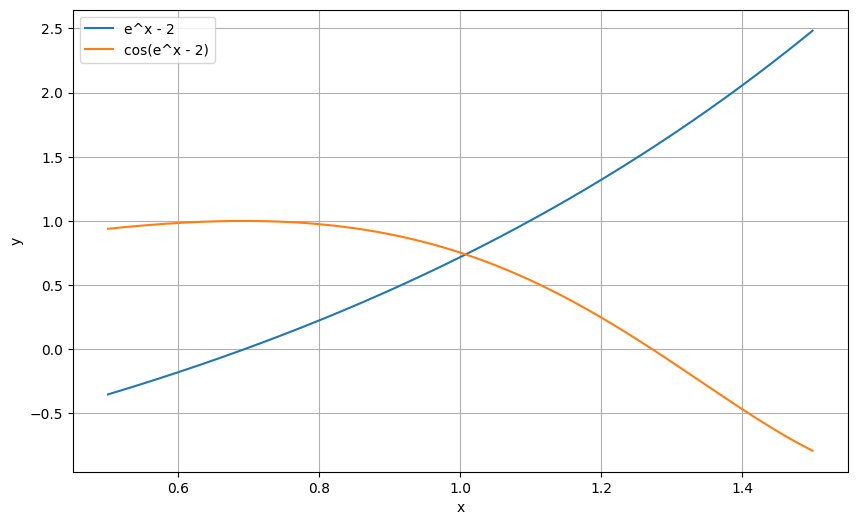

In [30]:
# Generate x-values
x = np.linspace(.5, 1.5, 400)

# Compute y-values for each function
def funcA(x):
    return math.e ** x - 2
def funcB(x):
    return math.cos(math.e ** x - 2)

y1 = [funcA(a) for a in x]
y2 = [funcB(a) for a in x]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='e^x - 2')
plt.plot(x, y2, label='cos(e^x - 2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


## 2.b

e ** x − 2 = cos(e ** x − 2)

becomes

0 = cos(e ** x - 2) - e ** x + 2

In [31]:
func4 = lambda x: math.cos(math.e ** x - 2) - math.e ** x + 2
a1 = 0.5
b1 = 1.5
tol1 = 10 ** -5

bisection(func4, a1, b1, tol1)

(1.0076141357421875, 16)

## 2.c

Iterations n s.t. starting bounds a = 0.5, b = 1.5 have accuracy within 10 ** -5

- Error Estimate = (b - a) / 2 ** n

- (1.5 - 0.5) / 2 ** n < 10 ** -5

- 1 / 2 ** n < 10 ** -5

- 2 ** n > 10 ** 5

- nlog10(2) > 5

- n > 5 / log10(2)

- approx = 16.6

n >= 17

## 2.d

Minimum number of iterations to guarentee accuracy 10 ** -5 predicted by error estimate: 17

Actual value of number of iterations to achieve accuracy 10 ** -5: 16

This answer makes sense as 17 is the theoretical lower bound for a guarenteed accuracy within 10 ** -5 of the true answer. As the actual value is lower, it simply took less than that number to get within the accuracy.

# Question 3

## 3.a

In [41]:
#Modified Function to add maximum number of iterations

def bisectionA(f, a, b, tol, maxIterations):
    # f is the function
    # a is the left endpoint
    # b is the right endpoint
    # tol is the tolerance
    # maxIterations is the maximum number of iterations
    
    count = 0 # counts the number of iterations
    while (b-a)/2 > tol and count < maxIterations: # iterate while error > tol
        p = (a+b)/2 # approx solution
        if f(a)*f(p)<0:
            b = p
        else:
            a = p
        count+=1 # add to count
    return p, count # return both root and count

## 3.b

In [48]:
#Modified Function to add exit if f(p) == 0 (f(p) < small number epsilon)

def bisectionB(f, a, b, tol, maxIterations):
    # f is the function
    # a is the left endpoint
    # b is the right endpoint
    # tol is the tolerance
    # maxIterations is the maximum number of iterations
    
    epsilon = 10 ** -13    #Epsilon set as a small number

    count = 0 # counts the number of iterations
    while (b-a)/2 > tol and count < maxIterations: # iterate while error > tol
        p = (a+b)/2 # approx solution
        count+=1 # add to count
        print(p, count)
        if abs(f(p)) < epsilon:
            print("Found correct f(p)")
            return p, count
        if f(a)*f(p)<0:
            b = p
        else:
            a = p
        
        

    return p, count # return both root and count

## 3.c

In [49]:
func5 = lambda x: x ** 2 - 1 
a1 = 0
b1 = 8
tol1 = 10 ** -8
maxIterations = 4

bisectionB(func5, a1, b1, tol1, maxIterations)

4.0 1
2.0 2
1.0 3
Found correct f(p)


(1.0, 3)

As we can see, the function requires 3 iterations (including the last, which finds the answer) and then exits as it finds where f(p) == 0.